<img src="Analysis_repo\Images\data_logo.png" alt="Data_Logo" title="Data_Logo" style="float:right;margin-right: 7px;" width="150"/>

## Federal Reserve Data Analytics
### _Consumer Credit Analytics_

### [1] Summary and introduction to the study  

Mismanaged risk in dealing with consumer credit data formed a key component during the global financial crisis in 2008. Many lessons were learned from that market crash with regards to dealing with un-securtized consumer credit and general credit. 

In this study we are going to examine consumer credit data since the global financial crisis and see if we have learned our lessons and where we can improve our understanding of global market credit risk in our ever increasingly interconnected world.<br><br>

<b>_1.1 - What does this data represent?_</b><br>
The following data is time series consumer credit data collected by the Federal Reserve Bank on a month-to-month basis. This data amongst other data is used to analyse the credit health of the American consumers. The time period under consideration is for the past decade, 2013 to 2023. 

_Disclaimer: An update is pending to make it so that users can pick a time period that they desire to analyse the data_<br><br>

<b>_1.2 - Purpose of analysis?_</b><br>
The purpose of this study is analyse the consumer credit data through various methods including using this very data to create models that can be used to uncover relationships and predict trends in the consumer credit through various market cycles over time.<br><br>

<b>_1.3 - Who is this analysis useful to?_</b><br>
This analysis is useful to various stakeholders including:
- companies that offer credit services to clients, 
- banks, 
- educational institutions and many other organizations.<br><br>

<b>_1.4 - The Economic data we are going to focus in on this study are_:</b><br>

1. Net overall consumer credit data<br>

2. Total consumer credit data:
    - Revolving Total consumer credit owned.
    - Non-revolving total consumer credit owned.<br>
3. Total consumer credit owned and securitized data:
    - Revolving Total consumer credit owned and securitized
    - Non-revolving total consumer credit owned and securitized<br>
3. Non-revolving consumer credit data owned by:
    - Finance companies
    - Non-financial companies
    - Non-profit and educational institutions
    - Federal Government
    - Credit unions<br>
4. Revolving consumer credit data owned by:
    - Finance companies
    - Non-financial companies
    - Non-profit and educational institutions
    - Federal Government
    - Credit unions<br>

<b>_1.5 - Questions that we seek to answer in this study:_</b><br>

1. Rear view question 
2. Plot: Total Non-Revolving and Revolving consumer credit from the past decade.
3. Plot: Owners of consumer credit by industry per quarter in the past decade.  
4. Plot: Ratio of credit owned and securitized consumer credit over credit owed for the past decade. (not seasonally adjusted)
5. How does consumer credit change over time in relation to the FED interest rate? 
6. How does consumer credit change over time in relation to the FED interest rate? 
7. How does consumer credit change over time in relation to the FED interest rate? 
8. future based question
9. future based question
10. Conclusion 

<b>_1.6 - Data source(s):_</b><br>
- Consumer credit data: https://www.federalreserve.gov/releases/g19/current/default.htm


### [2] Data study and general imports

In [3]:
# import 
import Analysis_repo
from Analysis_repo import sourceCode
from Analysis_repo import notebook_import_library as importLibrary


# Get the data form the Source code file
try:
    
    consumer_credit_data = sourceCode.sendConsumerCreditData()[5:].reset_index() # get consumer credit data
    consumer_credit_data_for_analysis = consumer_credit_data.copy() # df to be used for actual analysis
    consumer_credit_data_for_analysis = consumer_credit_data_for_analysis.drop(["index"], axis=1) # remove  default index column
except Exception as e:
    print("An exception occurred:", e)
    
#consumer_credit_data_for_analysis[0:]

#### [2.1] Data Study

In [4]:
consumer_credit_data_for_analysis.columns

Index(['Series Description',
       'Total consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Total consumer credit owned and securitized, not seasonally adjusted flow, monthly rate',
       'Total securitized consumer credit, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned by depository institutions, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned by commercial banks, not seasonally adjusted flow, monthly rate (discontinued after February 2011)',
       'Total consumer credit owned by savings institutions, not seasonally adjusted flow, monthly rate (discontinued aft

#### [2.2] Visualizations analysis

##### [2.2.1] Plot Data Zone

In [44]:
# Data

# PLOT 1
credit_date = consumer_credit_data_for_analysis["Series Description"]
net_non_rev_credit = consumer_credit_data_for_analysis["Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate"]
net_rev_credit = consumer_credit_data_for_analysis["Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate"]

# Total cons credit by type df
Net_consumer_credit_by_type_df = importLibrary.pd.DataFrame()
Net_consumer_credit_by_type_df['Credit Date'] = credit_date
Net_consumer_credit_by_type_df['Net Nonrevolving Credit'] = net_non_rev_credit.astype(float) 
Net_consumer_credit_by_type_df['Net Revolving Credit'] = net_rev_credit.astype(float) 

Year_list = [] #store year values
for year_value in credit_date: # create list of year values
    Year_list.append(year_value[:4])

Net_consumer_credit_by_type_df['Year'] = Year_list # create year column
Net_consumer_credit_by_type_df['Year']  = Net_consumer_credit_by_type_df['Year'] .astype(int) 

grouped_data = Net_consumer_credit_by_type_df.groupby('Year')[['Net Nonrevolving Credit', 
                                                                'Net Revolving Credit']].sum().reset_index()

# PLOT 2
# setting data by quarter
NR_credit_owned = importLibrary.pd.DataFrame()
NR_credit_owned['Credit Date'] = credit_date
NR_credit_owned['Year'] = Year_list # create year column
NR_credit_owned['Year']  = NR_credit_owned['Year'] .astype(int)
NR_credit_owned['Credit Unions']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by credit unions, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Finance companies']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by finance companies, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Federal government']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by federal government, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Non-Profit and Educational']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by nonprofit and educational institutions, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Non-financial']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by nonfinancial business, not seasonally adjusted flow, monthly rate'] .astype(float) 

Quarter_list= []
for date_value in credit_date:
    month = int(date_value[-2:])
    q_value = 0
    
    if(1 <= month <= 3): q_value = 1 # From jan to Mar
    elif(4 <= month <= 6): q_value = 2 # from Apr to Jun
    elif(7 <= month <= 9): q_value = 3 # from Jul to Sep
    elif(10 <= month <= 12): q_value = 4 # from Oct to Dec
    
    Quarter_list.append(q_value) # add quarter value to list.
    
NR_credit_owned['Quarter'] = Quarter_list # create quarter column
NR_credit_owned['Quarter']  = NR_credit_owned['Quarter'] .astype(int) 

quarter_grouped_data = NR_credit_owned.groupby(['Year', 'Quarter'])[['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial']].sum().reset_index()

# PLOT 3
TC_ratio_df = importLibrary.pd.DataFrame()
TC_ratio_df['Credit Date'] = credit_date
TC_ratio_df['Year'] = Year_list # create year column
TC_ratio_df['Year']  = TC_ratio_df['Year'] .astype(int)
TC_ratio_df['Net credit owned']  = consumer_credit_data_for_analysis['Total consumer credit owned and securitized, seasonally adjusted flow, monthly rate'] .astype(float) 
TC_ratio_df['Net Credit owned and securitized']  = consumer_credit_data_for_analysis['Total securitized consumer credit, not seasonally adjusted flow, monthly rate'] .astype(float) 
TC_ratio_df['Net Credit owned and Unsecuritized']  =  TC_ratio_df['Net credit owned']  + TC_ratio_df['Net Credit owned and securitized']

TC_ratio_grouped_data = TC_ratio_df.groupby('Year')[['Net Credit owned and securitized', 'Net Credit owned and Unsecuritized']].sum().reset_index()


#PLOT 4

NR_total_by_firm_dict = {
    "Credit Unions": abs(round(sum(NR_credit_owned['Credit Unions']), 4)),
    "Finance companies": abs(round(sum(NR_credit_owned['Finance companies']), 4)),
    "Federal government": abs(round(sum(NR_credit_owned['Federal government']), 4)),
    "Non-Profit and Educational": abs(round(sum(NR_credit_owned['Non-Profit and Educational']), 4)),
    "Non-financial": abs(round(sum(NR_credit_owned['Non-financial']), 4)),
}

#PLOT 5


##### [2.2.2] Actual Plots

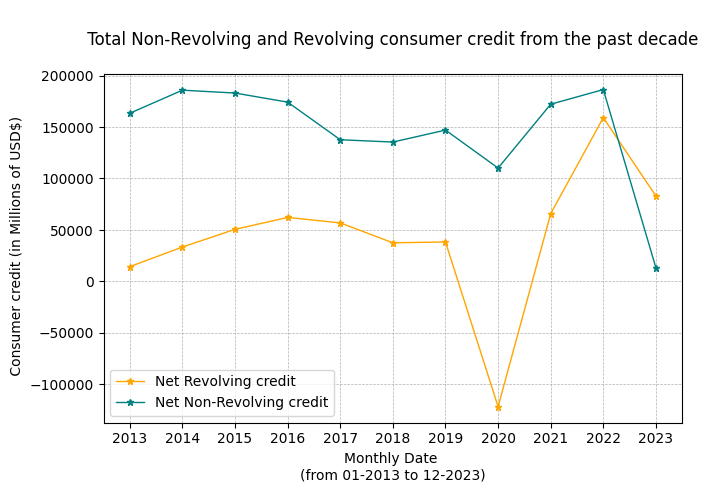

In [51]:
# Total consumer credit for each year for the past 10 years by Revolving and Non-revolving consumer credit data

importLibrary.plt.figure(figsize=(7, 5)) # setting plot size

# Creating line plots
importLibrary.plt.plot(grouped_data['Year'], grouped_data['Net Revolving Credit'], color='orange', marker='*', linestyle='-', linewidth=1, markersize=5, label='Net Revolving credit')
importLibrary.plt.plot(grouped_data['Year'], grouped_data['Net Nonrevolving Credit'], color='teal', marker='*', linestyle='-', linewidth=1, markersize=5, label='Net Non-Revolving credit')

# Add labels and title
importLibrary.plt.title('\n Total Non-Revolving and Revolving consumer credit from the past decade \n')
importLibrary.plt.xlabel('Monthly Date \n(from 01-2013 to 12-2023)')
importLibrary.plt.xticks(grouped_data['Year']) # hide the date tick labels
importLibrary.plt.ylabel(' Consumer credit (in Millions of USD$)')
importLibrary.plt.tight_layout(pad=1) # opens spaces of for percentages on y-axis
importLibrary.plt.legend(loc='lower left')

# Cutomize grid on the plot
importLibrary.plt.grid(True, linestyle='--', linewidth=0.5, which='both') # plot grid



- _Plot observation_ : <br> From this Line graph we can observe the [Revolving Credit](#Dictionary) had a sharp decline between 2019 and 2020, the peak global pandemic years, 2020 to 2021, the credit type rebounded to a new high in 8 years and kept on increasing till 2022. The [Non-Revolving Credit](#Dictionary) remained in a fair range between 2013 and 2022, and both the Revolving and non- revolving dcreased sharply between 2022 and 2023.


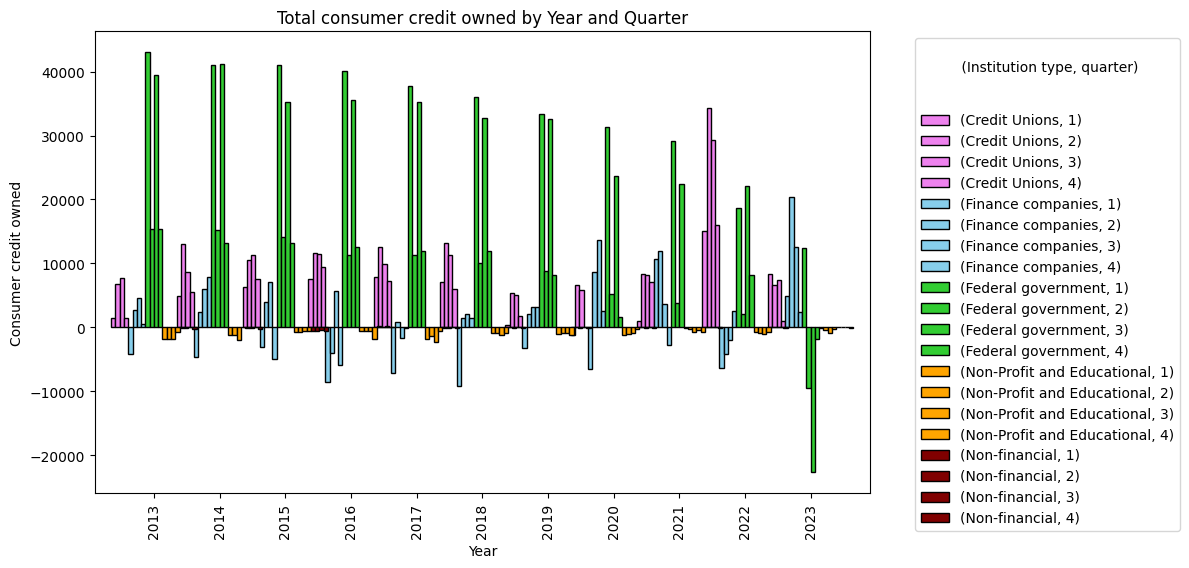

In [127]:
# Seasonality plot - 
pivot_data_pvg= quarter_grouped_data.pivot(index='Year', columns='Quarter', values=['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial'])

# Plotting
fig, ax = importLibrary.plt.subplots(figsize=(10, 6))

# Plot each column with the same color
credit_owner_color_index = {
    "(Credit Unions, 1)": 'violet',
    "(Credit Unions, 2)": 'violet',
    "(Credit Unions, 3)": 'violet',
    "(Credit Unions, 4)": 'violet',
    "(Finance companies, 1)": 'skyblue',
    "(Finance companies, 2)": 'skyblue',
    "(Finance companies, 3)": 'skyblue',
    "(Finance companies, 4)": 'skyblue',
    "(Federal government, 1)": 'limegreen',
    "(Federal government, 2)": 'limegreen',
    "(Federal government, 3)": 'limegreen',
    "(Federal government, 4)": 'limegreen',
    "(Non-Profit and Educational, 1)": 'orange',
    "(Non-Profit and Educational, 2)": 'orange',
    "(Non-Profit and Educational, 3)": 'orange',
    "(Non-Profit and Educational, 4)": 'orange',
    "(Non-financial, 1)": 'maroon',
    "(Non-financial, 2)": 'maroon',
    "(Non-financial, 3)": 'maroon',
    "(Non-financial, 4)": 'maroon',
}
credit_owner_color_cols = importLibrary.pd.Index(list(credit_owner_color_index.keys()))


# Create a custom color map
cmap = importLibrary.ColorMap([credit_owner_color_index.get(col, 'lightgray') for col in credit_owner_color_cols])

# Plotting
pivot_data_pvg.plot(kind='bar', ax=ax, colormap=cmap, width=1.3, edgecolor='black')     

# Add labels and title
importLibrary.plt.xlabel('Year')
importLibrary.plt.ylabel('Consumer credit owned')
importLibrary.plt.title('Total consumer credit owned by Year and Quarter')

# Add legend
importLibrary.plt.legend(title='\n (Institution type, quarter)\n\n', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
importLibrary.plt.show()




- _Plot observation_ : <br> From this Line graph we can observe the [Revolving Credit](#Dictionary) had a sharp decline between 2019 and 2020, the peak global pandemic years, 2020 to 2021, the credit type rebounded to a new high in 8 years and kept on increasing till 2022. The [Non-Revolving Credit](#Dictionary) remained in a fair range between 2013 and 2022, and both the Revolving and non- revolving dcreased sharply between 2022 and 2023.


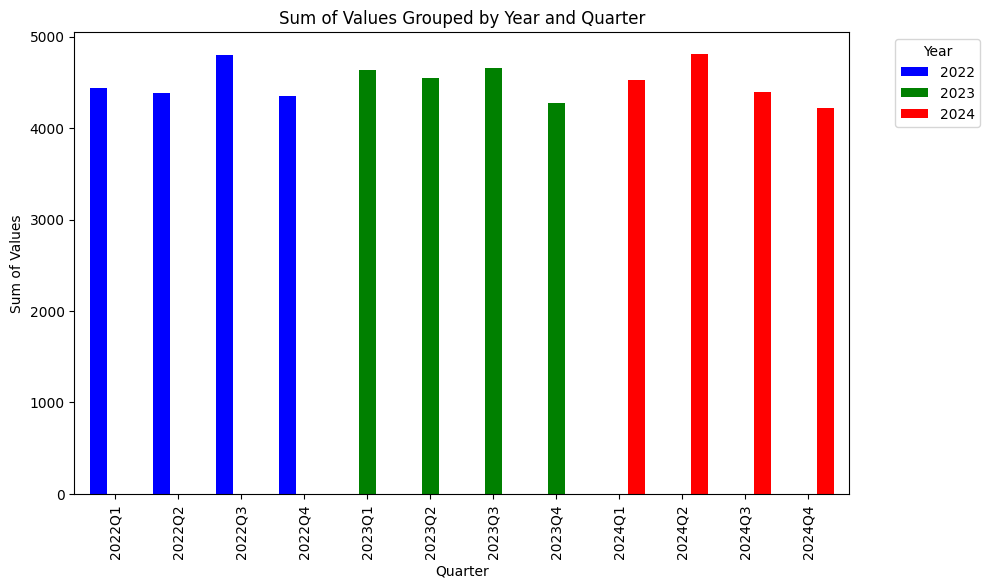

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sample data
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')
data = np.random.randint(1, 100, len(date_rng))

# Create a DataFrame
df = pd.DataFrame({'Date': date_rng, 'Value': data})

# Extract year and quarter from the Date column
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

# Group data by year and quarter, and calculate the sum of values
grouped_data = df.groupby(['Year', 'Quarter'])['Value'].sum().reset_index()

# Pivot the DataFrame for plotting
pivot_data = grouped_data.pivot(index='Quarter', columns='Year', values='Value')

# Specify colors for certain columns
colors_for_columns = {
    2022: 'blue',
    2023: 'green',
    2024: 'red',
}

# Create a custom color map
cmap = ListedColormap([colors_for_columns.get(col, 'lightgray') for col in pivot_data.columns])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

pivot_data.plot(kind='bar', ax=ax, colormap=cmap, width=0.8)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year and Quarter')

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [99]:
pivot_data.columns

Index([2022, 2023, 2024], dtype='int32', name='Year')

In [52]:
# #Seasonality plot

# pivot_data = quarter_grouped_data.pivot(index='Year', columns='Quarter', values=['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial'])

# # Plotting
# fig, ax = importLibrary.plt.subplots(figsize=(10, 6))


# colors = importLibrary.plt.cm.get_cmap('Set3', len(pivot_data.columns)) # set colors by owner of consumer credit

# # Plot each column with the same color
# for i, (year, color) in enumerate(zip(pivot_data.columns, colors(range(len(pivot_data.columns))))):
#     if(pivot_data.columns[i][0] == 'Credit Unions'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='blue', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Finance companies'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='yellow', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Federal government'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='green', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Non-Profit and Educational'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='brown', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Non-financial'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='red', label=pivot_data.columns[i], width=0.8, position=i)
        
        

# # Add labels and title
# importLibrary.plt.xlabel('Quarter')
# importLibrary.plt.ylabel('Sum of Values')
# importLibrary.plt.title('Sum of Values Grouped by Year and Quarter')

# # Add legend
# importLibrary.plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# importLibrary.plt.show()

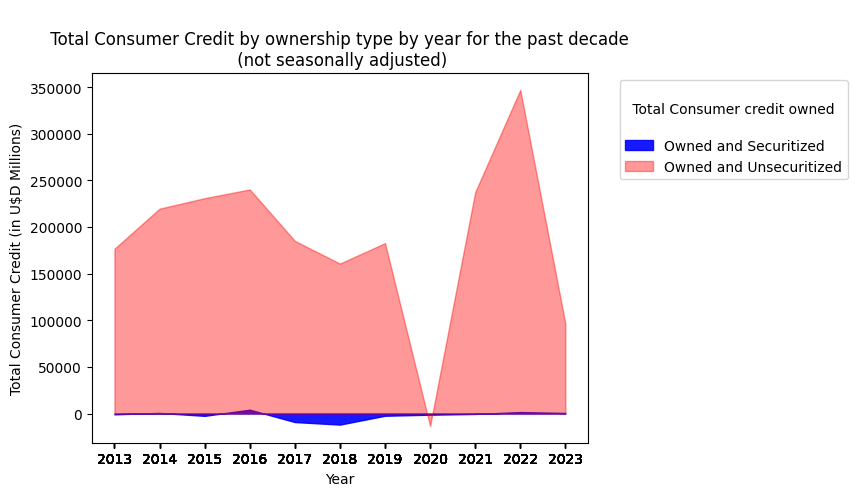

In [48]:
# Plot 3
# Ratio of credit owned and securitized consumer credit over credit owed for the past decade. (not seasonally adjusted)

# Plot
fig, ax = importLibrary.plt.subplots()
ax.fill_between(TC_ratio_grouped_data['Year'], TC_ratio_grouped_data['Net Credit owned and securitized'], color='blue', alpha=0.9, label='Owned and Securitized')
ax.fill_between(TC_ratio_grouped_data['Year'], TC_ratio_grouped_data['Net Credit owned and Unsecuritized'], color='red', alpha=0.4, label='Owned and Unsecuritized')


# # Add labels and title
importLibrary.plt.xlabel('Year')
importLibrary.plt.ylabel('Total Consumer Credit (in U$D Millions)')
importLibrary.plt.xticks(TC_ratio_df['Year'])
importLibrary.plt.title('\n Total Consumer Credit by ownership type by year for the past decade \n (not seasonally adjusted)')
importLibrary.plt.legend(title='\n Total Consumer credit owned \n', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
importLibrary.plt.show()

- _Plot observation_ : <br> 
From this area plot we can observe that the  graph we can observe the total [Owned](#Dictionary) consumer credit was in a fairly constant range between 2013 and 2019, which peaked in 2015. A sharp decline is observed between 2019 and 2020, the peak global pandemic years, this illustrates to use that consumers credit demand decreased sharply due to the economic slowdown or the firms offering credit were more restrictive during this period, or a combination of both. The [Owned and securtized](#Dictionary) cosnumer credit remained fairly consistent during this period, and had a mild decline in 2018.

- From 2020 to 2022 as part of the reopening more credit was incurred by consumers this period in attempt to recover from the pandemic economic slowdown. In 2022, the total consumer credit owned peaked at $345506.36 Million dollars, a new high for the past decade. As we saw in the market and media, while the extra credit was crucial in the American economy recovery, this was in response to another problem that arose, the inflation crises of 2023. To comabt inflation, the federal government implemented measures to combate the inflation crisis, and as response firms offered and owned less consumer credit due to high interest rates, hence why the consumer credit decreased sharply in the 2022/2023 period.


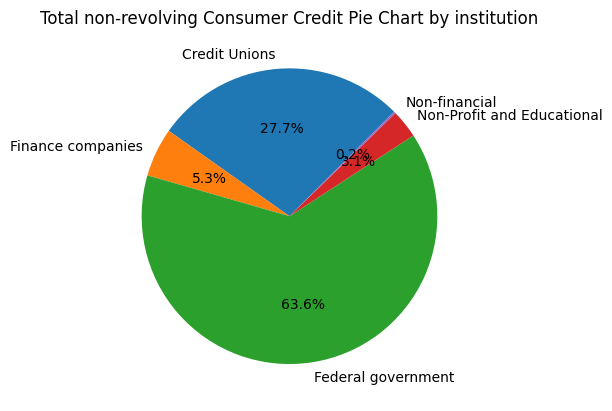

In [49]:
#PLOT 4
# Plot Non-revolving Consumer Credit pie chart by institution
Pie_chart_labels = list(NR_total_by_firm_dict.keys())
Pie_chart_values = list(NR_total_by_firm_dict.values())

importLibrary.plt.title('Total non-revolving Consumer Credit Pie Chart by institution', loc='center')
importLibrary.plt.pie(Pie_chart_values, labels=Pie_chart_labels, autopct='%1.1f%%', startangle=45)
importLibrary.plt.show()


- _Plot observation_ : <br> From this Line graph we can observe the [Revolving Credit](#Dictionary) had a sharp decline between 2019 and 2020, the peak global pandemic years, 2020 to 2021, the credit type rebounded to a new high in 8 years and kept on increasing till 2022. The [Non-Revolving Credit](#Dictionary) remained in a fair range between 2013 and 2022, and both the Revolving and non- revolving dcreased sharply between 2022 and 2023.


In [ ]:
#PLOT 5
# Plot Non-revolving Consumer Credit pie chart by institution



### Dictionary

1. <b>Revolving credit</b><br> A type of credit that allows borrowers to repeatedly borrow up to a certain credit limit. As the borrower repays the outstanding balance, the available credit is replenished, and they can use it again. Credit cards and lines of credit are common examples of revolving credit.<br>

2. <b>Non-revolving credit</b><br>A one-time loan that is typically repaid in fixed installments over a specified period. Once the borrower repays the loan, the credit is no longer available. Installment loans for major purchases, such as auto loans or student loans, fall under the category of non-revolving credit.

2. <b>Consumer credit owned</b><br>When a financial institution or lender holds consumer credit on its balance sheet without bundling or selling it as a security, it is referred to as "consumer credit owned."In this scenario, the lender retains ownership of the individual loans, and the loans are not packaged or sold to external investors.The lender continues to collect payments and is exposed to the credit risk associated with the loans.

2. <b>Consumer credit owned and securitized</b><br>"Consumer credit owned and securitized" refers to the process of bundling individual consumer loans into a financial instrument known as a security.These securities are then sold to investors in the financial markets. The process of securitization involves creating a pool of loans, dividing it into different tranches with varying levels of risk, and issuing securities backed by these tranches.
Once securitized, the lender no longer holds the individual loans on its balance sheet, and the risk associated with those loans is transferred to the investors who hold the securities. E.g, Mortgage-backed securities (MBS) and asset-backed securities (ABS)







### [6] References